# Machine learning tools for oceanography: Dynamical regime example

Data is available in unprecedented amounts, and machine learning merges together statistics, computer science, mathematics, physics, and many more to create tools to explore it. Increasingly, the analysis capability is also increasing, and it is being made available to anyone with a laptop, through open source initiatives e.g. within the Python ecosystem. This is a very exciting development for oceanography as a field, but should be applied with care and robustness of applications validated as far as possible.

In this hands-on tutorial, we will explore concepts as they relate to an oceanographic application. We will use unsupervised machine learning. The outline is as follows:

1. An appreciation of the dynamical regime problem as it applies to oceanography 
2. Using theoretical tools for dimensionality reduction
3. Using unsupervised machine learning to explore the equation space objectively, applying model selection criteria
4. Appreciating and accounting additional utility criterion for oceanographic applications


This tutorial is based on the papers:

Maike Sonnewald and Redouane Lguensat. Revealing the impact of global
heating on north atlantic circulation using transparent machine learning. Earth
and Space Science Open Archive, page 27, 2021.

Maike Sonnewald, Carl Wunsch, and Patrick Heimbach. Unsupervised learning
reveals geography of global ocean dynamical regions. Earth and Space Science,
6(5):784–794, 2019.



## 1. The dynamical regime problem: Dynamical systems analysis at its core

As a general approach to exploration of dynamical systems, exploration of equation space has a long history within science. Having described a larger system, a search for sub-regimes is attractive, as it enables simplifications that for example can focus further exploration. In effect, one looks for dynamical regimes within the larger system. Examples stretch far beyond oceanography, including for example the Lorenz ``strange attractor'' in the atmosphere, ecological species compositions,  turbulent and vortical flows and tumor growth. 





## 2. Oceanographic dynamical regimes

### Theoretical dimensionality reduction using theory

Within oceanography,there is a long history of using a vorticity framework fot theoretical exploration. In this tutorial, we use data from the realistic 1◦ numerical ocean model Estimating the Circulation and Climate of the Ocean (ECCOv4 (Forget et al., 2015; Adcroft et al., 2004; Wunsch & Heimbach, 2013)). Here, ``realstic'' refers to using data from the atmosphere as forcing, and ocean depth information (bathymetry) to set the bottom boundary location. Approached naively, finding robust regimes is intractable due to the high dimensionality of the complex numerical model, with a high likelihood of non-unique solutions conflating interpreatation and useful conclusions.
 

To arrive at the five dimensional field from the full 3D model fields in Sonnewald et al. 2019, a closed momentum budget was used. The discussion below is adapted from Sonnewald et al. (2019, 2021). The momentum and continuity equations of the ocean are seen as a thin shell sitting on a rotating sphere:


\begin{equation}
\partial_t \mathbf{\mathrm{u}}+ f \mathbf{\mathrm{k}}\times \mathbf{\mathrm{u}} = -\frac{1}{\rho_0}\nabla_h \mathrm{p} + \frac{1}{\rho_0} \partial_z \tau + \mathbf{\mathrm{a}}+\mathbf{\mathrm{b}}, \partial_z \mathrm{p} = -\mathrm{g} \rho
\end{equation}

\begin{equation}
\nabla_h \cdot \mathbf{\mathrm{u}}+\partial_z w=0,
\end{equation}

Pressure, gravity, density, and vertical shear stress are p, g, $\rho$, and $\tau$, respectively, with $\rho_0$ the reference density; the three‐dimensional velocity field \textbf{v} = (u, v, w) = (\textbf{u}, w); the gradient $\nabla=(\nabla_h,\partial z)$; the unit vector is denoted \textbf{k}; planetary vorticity is a function of latitude $\theta$ in $f \mathbf{\mathrm{k}} = (0,0,2\Omega \mathrm{sin}(\theta))$; the viscous forcing from vertical shear is $\partial_z \tau$; the nonlinear torque is \textbf{a}, and the horizontal viscous forcing \textbf{b} includes subgrid‐scale parameterizations. Under steady state, the vertical integral from the surface $z=\eta(x,y,t)$ to the water depth below the surface $z=H(x,y)$ is



\begin{equation}
\beta V = \frac{1}{\rho_0}\nabla \mathrm{p}_{b} \times \nabla H + \frac{1}{\rho_0}\nabla \times \mathbf{\tau} + \nabla \times \mathrm{\textbf{A}} + \nabla \times \mathrm{\textbf{B}}
\label{BV}
\end{equation}

where $\nabla \mathbf{\mathrm{U}}=0$, $\mathbf{\mathrm{U}}\cdot \nabla f= \beta V$, the bottom pressure is denoted $\mathrm{p}_b$, $\mathbf{\mathrm{A}}=\int_{H}^{\eta}\mathbf{\mathrm{a}}\mathrm{d} z $, and $\mathbf{\mathrm{B}}=\int_{H}^{\eta}\mathbf{\mathrm{b}}\mathrm{d}z$. The curl operator $\nabla \times$ produces a scalar, that represents the vertical component of the operator. The left‐hand side of equation 3 is the planetary vorticity advection term, while the right‐hand side of equation 3 is the bottom pressure torque (BPT), the wind and bottom stress curl, the nonlinear torque, and the viscous torque, respectively. 
The five terms in equation 3 constitute the dynamical drivers/terms are the fundamental sources of depth integrated (barotropic) vorticity: on the LHS, the advection of planetary vorticity, on the RHS from left to right, bathymetric interactions through bottom pressure torque, the wind and bottom stress curl, curl of non-linear interactions between terms and the lateral viscous dissipation from within the ocean interior. \\

The subgrid‐scale parameterization introduces a torque, which is included in the viscous torque term. Nonlinear torque is composed of three terms:



\begin{equation}
    \nabla \times \mathbf{\mathrm{A}}=\nabla \times [ \int^{\eta}_{-H}\nabla \cdot (\mathbf{\mathrm{uu}})dz ] + [w\zeta]^{z=\eta}_{z=H}+[\nabla w\times\mathbf{\mathrm{u}}]^{z=\eta}_{z=H}
\end{equation}

where $\mathbf{uu}$ is a second‐order tensor. The right‐hand side of equation 4 represents the curl of the vertically integrated momentum flux divergence, the nonlinear contribution to vortex tube stretching, and the conversion of vertical shear to barotropic vorticity. Horizontal viscous forcing includes that induced by subgrid‐scale parameterizations. In Sonnewald et al. (2019), twenty‐year averaged fields (1992-2013) are used after a Laplacian smoother is applied, with an effective averaging range of three grid cells. 

## 3. K-means as an unsupervised equation exploration tool


Unsupervised learning techniques are a great way to explore data, even if you may not know the underlying structure. There are many algorithms available, and here we use k-means as our exploratory tool. 

### K-means assumptions to be aware of:

With every clustering algorithm come assumptions about the data. These "assumptions" refer to the structures within how different variables within a data set interract with one another. These interactions produce different "shapes". For data that are "round" (also refered to as "Gaussian"), k-means is a good starting point.

The k-means algorithm is based on underlying mathematics that allows it to partition the area and identify clusters (Voroni diagrams). The way it does this is by effectively drawing "straight lines" (in examples here in 2D). It follows that any structures that k-means can't be seperate using straight lines would mean that the results would be poor. This effectively means that k-means would only do a "perfect" job if our data were normally distributed; a very strong assumption.

To initialize, the k-means algorithm makes a stochastic guess. This means that points are initially scattered across the data, and the algorithm iterates until a "maximum" in found. This maximum is determined by minimuzimg the objective function J:

$$J = \sum^{k}_{j=1} \sum^{n}_{i=1} ||x^{j}_i - c_{j}||^2$$

where $k$ is the number of clusters, $n$ is the number of data points, $c$ is the place where the "guess" of the cluster location is.




## 4. Domain specific utility criterium

For applications within oceanography, the results even though they may be statistically significant, end up not being useful. For example, if an identified region should be used to make a sample that is representative of a cluster, there needs to be suficient confidence that a sample will truly be representative of this area.

Here, we define such a utility criterium based on assessing the spatial area coverage.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans, DBSCAN
from sklearn import mixture
import seaborn as sns; sns.set()

import IPython.display as dis
from sklearn.preprocessing import StandardScaler
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib.colors import ListedColormap

import os
import matplotlib.pyplot as plt
import scipy as sp

from cartopy import config
import cartopy.crs as ccrs

sns.set()

colours=sns.color_palette('colorblind', 10)
my_cmap = ListedColormap(colours)


In [14]:
curlA = np.transpose(np.load('curlA.npy'))
curlB = np.transpose(np.load('curlB.npy'))
curlCori = np.transpose(np.load('curlCori.npy'))
curlTau = np.transpose(np.load('curlTau.npy'))
BPT = np.transpose(np.load('BPT.npy'))
noisemask = np.transpose(np.load('noiseMask.npy'))

grid = sp.io.loadmat('gridVars.mat')
land = grid['land'][:]
lat=grid['lat'][:]
lon=grid['lon'][:]
areaGlobal = grid['vortCellArea'][:]*np.rot90(np.flipud(noisemask),3)

In [5]:
Outputdata = np.stack((curlA,curlB,curlTau,curlCori,BPT),axis=2)
Outputdata.shape

(360, 720, 5)

In [6]:
## throwing out indices of land pixels and bad pixels
indmiss = (noisemask==1.).flatten()
## preparing data for k-means
Outputdata_m = np.reshape(Outputdata, (360*720, 5))[indmiss]
Outputdata_m.shape

(149714, 5)

In [7]:
scaler = StandardScaler()
Outputdata_s = scaler.fit_transform(Outputdata_m)

In [8]:
KM_all = cluster.KMeans(n_clusters=50, random_state=42, n_init=10)
kmeans_labels = KM_all.fit_predict(Outputdata_s)

In [9]:
cls = np.nan * np.ones(Outputdata.shape[0]*Outputdata.shape[1])
cls[indmiss] = kmeans_labels
kmeans_lables_plot = np.reshape(cls,Outputdata.shape[0:2])[::-1,:]

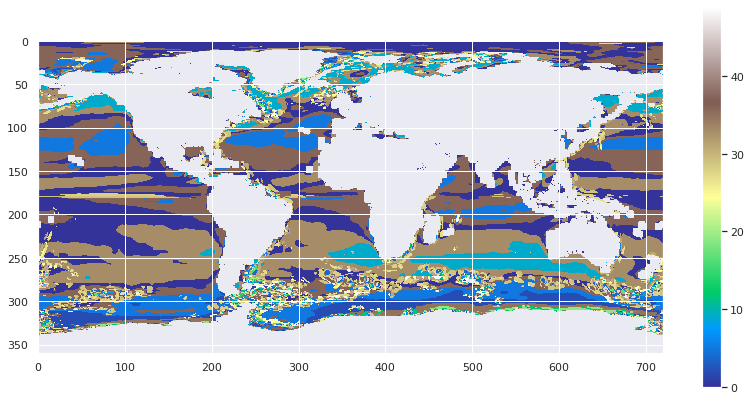

In [10]:
plt.figure(figsize=(14,7))
plt.imshow(kmeans_lables_plot, cmap=plt.cm.terrain)
plt.colorbar()
#Note: Colour assignments are arbitrairy

In [ ]:
data2plot.shape, lats.shape

In [ ]:
data2plot = np.rot90(np.flipud(kmeans_lables_plot),3)[3:,:]
lats = lat[3:,:]
lons = lon[3:,:]

ax = plt.axes(projection=ccrs.Robinson())

im2=plt.contourf(lons, lats, data2plot, np.arange(-1, 6, 1),
             transform=ccrs.PlateCarree(), cmap=my_cmap)

ax.coastlines()
ax.gridlines()

plt.show()

In [15]:
# Load labels used in Sonnewald et al. 2019 paper
labels=np.load('/home/maike/Documents/ECCO_BV/kCluster6.npy')


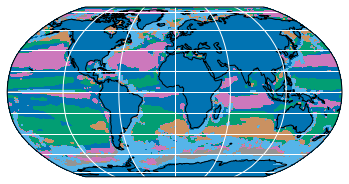

In [16]:

data2plot = (labels*np.rot90(np.flipud(noisemask),3))[3:,:]
lats = lat[3:,:]
lons = lon[3:,:]

ax = plt.axes(projection=ccrs.Robinson())

im2=plt.contourf(lons, lats, data2plot, np.arange(-1, 6, 1),
             transform=ccrs.PlateCarree(), cmap=my_cmap)

ax.coastlines()
ax.gridlines()

plt.show()

## 2. Using Information Criteria to inform parameter choices 

Assessing if identified structures give us "useful" information is very important, and we can do this applying statistical tools. Central among these are Information Criteria. Among there the Akaike Information Criteria (AIC) is very useful.

Suppose that we have a statistical model of some data. Let k be the number of estimated parameters in the model (for example the number of cluster guesses from k-means). Let ${\displaystyle {\hat {L}}}$ be the maximum value of the likelihood function for the model. Then the AIC value of the model is the following.

$$ {\displaystyle \mathrm {AIC} \,=\,2k-2\ln({\hat {L}})}$$



The likelihood is defined as:

$$ {\displaystyle {\mathcal {L}}(\theta \mid x)=p_{\theta }(x)=P_{\theta }(X=x),}$$

Let X {\displaystyle X} X be a discrete random variable with probability mass function p {\displaystyle p} p depending on a parameter θ {\displaystyle \theta } \theta . Considered as a function of θ {\displaystyle \theta } \theta , is the likelihood function, given the outcome x {\displaystyle x} x of the random variable X {\displaystyle X} X. 


Given a set of candidate models for the data, the preferred model is the one with the minimum AIC value. 

In practice however, using several different Information Criteria is more useful, as they make different assumptions regarding the penalization of increasing complexity/adding more parameters.

In [37]:
repeats = 5 # Remember there is stochasticity involved, so de do 10 repeats to collect some error estimates.
kClusterGuesses = [5,10,15,20,25,30,35,40,45,50,55] # Going up to a high number as out "guess" takes time, but it can be worth it!


criteriaAIC_BIC = np.zeros((repeats,2,len(kClusterGuesses)))
for rep in np.arange(0,repeats):
    itter = 0
    for nr in kClusterGuesses:#np.arange(1,kClusters):
        n_clusters=nr
        X=Outputdata_s
        model=mixture.GaussianMixture(n_components=n_clusters, init_params='kmeans')
        model.fit(X)
        criteriaAIC_BIC[rep,0,itter]=model.aic(X)
        criteriaAIC_BIC[rep,1,itter]=model.bic(X)
        itter+=1

/home/maike/Downloads/anaconda3/lib/python3.7/site-packages/sklearn/mixture/_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/home/maike/Downloads/anaconda3/lib/python3.7/site-packages/sklearn/mixture/_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/home/maike/Downloads/anaconda3/lib/python3.7/site-packages/sklearn/mixture/_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/home/maike/Downloads/anaconda3/lib/python3.7/site-packages/sklearn/mixture/_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter

Plotting the results fro the Akaike Information Criteria (AIC) and the Bayesian Information Criteria (BIC) can be very instructive. 

Both should initially decrease. The AIC should ideally asymptote and become a flat line, while the BIC may increase at one point, to then also becomme a flat line.

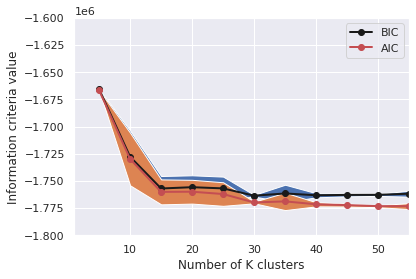

In [38]:
meanAIC = criteriaAIC_BIC[:, 0, 0:len(kClusterGuesses)].mean(axis = 0)
stdAIC = criteriaAIC_BIC[:, 0, 0:len(kClusterGuesses)].std(axis = 0)

meanBIC = criteriaAIC_BIC[:, 1, 0:len(kClusterGuesses)].mean(axis = 0)
stdBIC = criteriaAIC_BIC[:, 1, 0:len(kClusterGuesses)].std(axis = 0)

plt.plot(kClusterGuesses,meanBIC, '-ok', label='BIC', linewidth=2)
plt.fill_between(kClusterGuesses, meanBIC-2*stdBIC, meanBIC+2*stdBIC)

plt.plot(kClusterGuesses,meanAIC, '-or', label='AIC', linewidth=2)
plt.fill_between(kClusterGuesses, meanAIC-2*stdAIC, meanAIC+2*stdAIC)


plt.ylim(np.min(meanAIC[5:]), np.max(meanBIC))
plt.xlabel('Number of K clusters')
plt.ylabel('Information criteria value')
plt.legend()
plt.xlim(1,kClusterGuesses[-1])
plt.ylim(-1.8e6, -1.6e6)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.savefig('informationCriteriaAsymptoting_wError.png', format='png', dpi=500, bbox_inches='tight')  

In [39]:
percentageInKCluster = np.zeros([3,50])

for nr in np.arange(0,3):
    KM_all = cluster.KMeans(n_clusters=20)
    kmeans_labels = KM_all.fit_predict(Outputdata_s)

    cls = np.nan * np.ones(Outputdata.shape[0]*Outputdata.shape[1])
    cls[indmiss] = kmeans_labels
    kMeanResults = np.reshape(cls,Outputdata.shape[0:2])[::-1,:]
    
    for kNr in np.arange(0, 50):
        indexes = np.where(kMeanResults==kNr)
        vortCellAreaPercent=np.rot90(areaGlobal,1)
        hel = np.nansum(areaGlobal)
        percentageInKCluster[nr,kNr] = (np.nansum(vortCellAreaPercent[indexes])*100)/abs(hel)
    print(nr)

0
1
2


[49.63201626 30.55952008 13.17772285  2.24406521  0.98079529  0.74768178] 2.658198521966388
[2.18349072 5.89153881 4.33820318 0.45684236 0.10878183 0.22121631] 0.1345115212595356


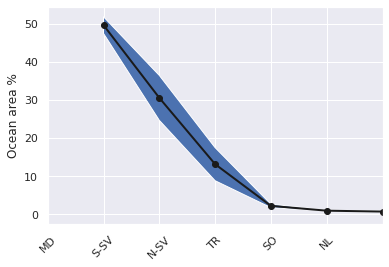

In [40]:
percentageInKClusterSorted = np.fliplr(np.sort(percentageInKCluster))

meanAIC_10reps_bic = percentageInKClusterSorted[:].mean(axis = 0)
stdAIC_10reps_bic = percentageInKClusterSorted[:].std(axis = 0)
print(meanAIC_10reps_bic[0:6], meanAIC_10reps_bic[6:50].sum())
print(2*stdAIC_10reps_bic[0:6], meanAIC_10reps_bic[6:50].std())

plt.plot(np.arange(0, 50),meanAIC_10reps_bic, '-ok', linewidth=2)
plt.fill_between(np.arange(0, 50), meanAIC_10reps_bic-2*stdAIC_10reps_bic, meanAIC_10reps_bic+2*stdAIC_10reps_bic)

plt.xlim(-1,5)

plt.ylabel('Ocean area %')
labels = ["MD", "S-SV", "N-SV", "TR", "SO", "NL"]

# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(np.arange(-1,6), labels, rotation='45')

plt.savefig('oceanAreaRobustCover_reLab2.png', format='png', dpi=500, bbox_inches='tight')  


## 3. More complex applications require an appreciation of for underlying assumptions

Because we mostly have limited or no knowledge of the structures in our data, it is important to be aware of the assumptions our clustering methods make. We need to assess if these assumptions are fair. If we don't take assumptions into account, we may end up with useless or even misleading results!



## 3.1 What if the structures are not "round"?

Unfortunately, most data one encounters are not "round"/Gaussian. Below we'll demonstrate what happens when we have different data distributions, and explore how "wrong" k-means can be.

- Assessing how good the fit is using the AIC and BIC are a good way of assessing if this could be an issue.

## 3.2 What if the stocastic element makes a difference? 

To initialize k-means the algorithm makes a stochastic "guess" as the cluster centers. This means that if we repeat the method, the initial "guess" could be different enough to give us a different answer. 

- Assessing how good the fit is using the AIC and BIC are a good way of assessing if this could be an issue.

We now make synthetic data that is not round but elongated (anisotropic). The difference in the structure of the data will be used to reveal the shortcomings of a method that operates under the assumptions of k-means.

Different methods operate under different assumptions. We explore the Density-based spatial clustering of applications with noise (DBSCAN). This algorithm uses the distance between the datapoints, and a set minimum of points needed to be "significant".

Text(0.5, 1.0, 'Anisotropicly Distributed Data')

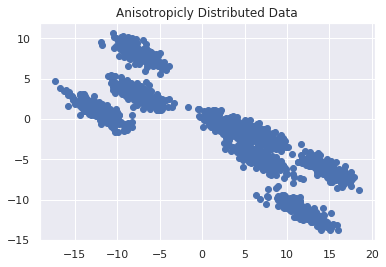

In [34]:
centerSeed = 8
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=centerSeed)


#### Anisotropicly distributed data ####
transformation = [[1.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

plt.scatter(X_aniso[:, 0], X_aniso[:, 1], cmap='viridis')
plt.title("Anisotropicly Distributed Data")



### Using k-means on structures that are not round

Here we demonstrate what k-means does when we explore data that do *not* conform with our assumption.

The data is somewhat randomly 'chopped', and fails to find the underlying structures.

Text(0.5, 1.0, 'Anisotropicly Distributed Data: K-means')

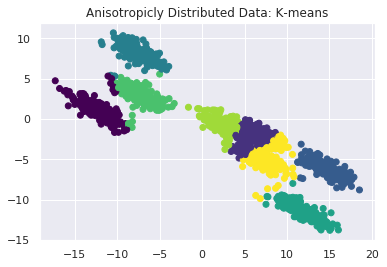

In [76]:
cluster_guess=8

y_pred = KMeans(n_clusters=cluster_guess, random_state=random_state).fit_predict(X_aniso)

plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred, cmap='viridis')
plt.title("Anisotropicly Distributed Data: K-means")


### Using  on structures that are not round

Here we demonstrate what k-means does when we explore data that do *not* conform with our assumption.

The data is somewhat randomly 'chopped', and fails to find the underlying structures.

In [77]:
db = DBSCAN(eps=EPS, min_samples=MIN_SAMP).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

IndentationError: unexpected indent (<ipython-input-77-0efc18fea93c>, line 2)

In [1]:

EPS=0.5
MIN_SAMP=12


#Anisotropicly distributed data
transformation = [[1.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = DBSCAN(eps=EPS, min_samples=MIN_SAMP).fit_predict(X_aniso)

print('The number of clusters DBSCAN found was: ', len(np.unique(y_pred)))
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred, cmap='viridis')
plt.title("Anisotropicly Distributed Data: DBSCAN")

NameError: name 'np' is not defined

## Bonus material

We continue to explore visually what happens when the structures we are looking for can and cannot be isolated using the clustering algorithms we have been exploring. 

Automatically created module for IPython interactive environment


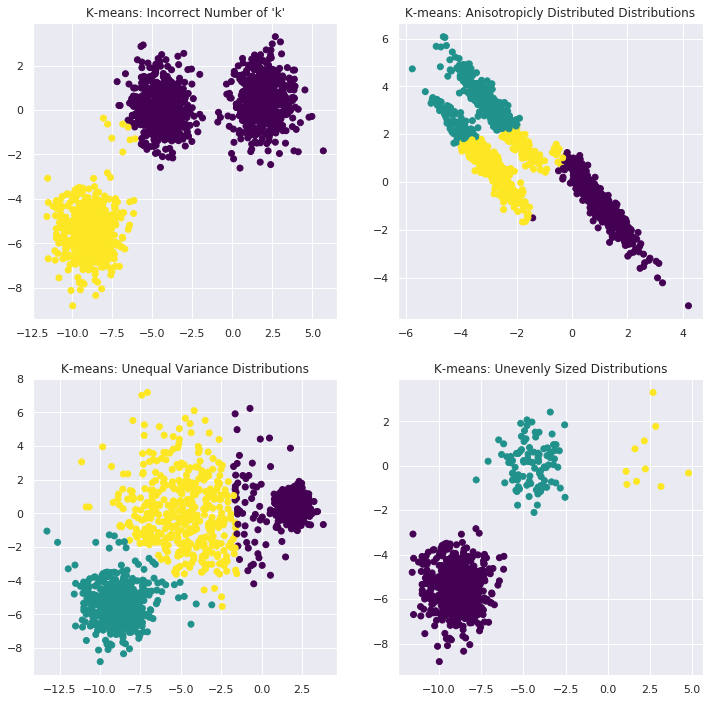

In [32]:
print(__doc__)

# Modofied by <maikejulie@gmail.com> from Phil Roth <mr.phil.roth@gmail.com>
# License: BSD 3 clause

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

#### Incorrect number of clusters ####
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
plt.title("K-means: Incorrect Number of 'k'")

#### Anisotropicly distributed data ####
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred, cmap='viridis')
plt.title("K-means: Anisotropicly Distributed Distributions")

#### Different variance #####
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred, cmap='viridis')
plt.title("K-means: Unequal Variance Distributions")

##### Unevenly sized blobs ####
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred, cmap='viridis')
plt.title("K-means: Unevenly Sized Distributions")

plt.show()

Automatically created module for IPython interactive environment


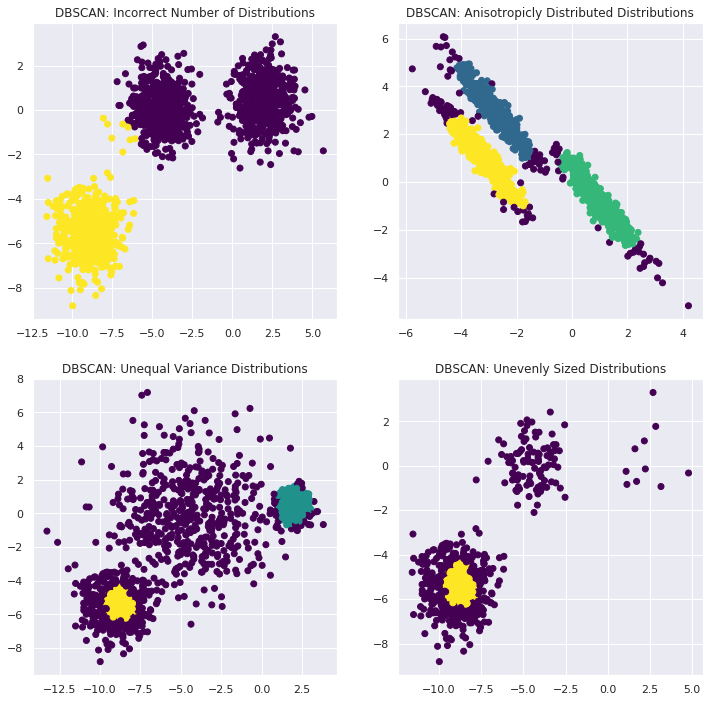

In [30]:
print(__doc__)

EPS=0.3
MIN_SAMP=20

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
plt.title("DBSCAN: Incorrect Number of Distributions")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = DBSCAN(eps=EPS, min_samples=MIN_SAMP).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred, cmap='viridis')
plt.title("DBSCAN: Anisotropicly Distributed Distributions")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = DBSCAN(eps=EPS, min_samples=MIN_SAMP).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred, cmap='viridis')
plt.title("DBSCAN: Unequal Variance Distributions")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = DBSCAN(eps=EPS, min_samples=MIN_SAMP).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred, cmap='viridis')
plt.title("DBSCAN: Unevenly Sized Distributions")

plt.show()

This tutorial is by Maike Sonnewald (github: maikejulie, maikejulie@gmail.com), drawing from Randy Olson (github: rhiever), and Phil Roth <mr.phil.roth@gmail.com>
(License: BSD 3 clause)